### Проект - Дашборд конверсий

In [499]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.colors as matcol
from dotenv import load_dotenv
from pathlib import Path
import matplotlib.cm as cm

## Задача 1 АПИ

# Запрос данных по API за период 2023-03-01 -> 2023-09-01

In [503]:
load_dotenv()

DATE_BEGIN = os.getenv('DATE_BEGIN')
DATE_END = os.getenv('DATE_END')
API_URL = os.getenv('API_URL')
#API_URL='https://data-charts-api.hexlet.app'
#DATE_BEGIN='2023-03-01'
#DATE_END='2023-09-01'

In [505]:
visits_url = f"{API_URL}/visits?begin={DATE_BEGIN}&end={DATE_END}"
visits_response = requests.get(visits_url)

In [506]:
if visits_response.status_code == 200:
    visits_data = visits_response.json()
    visits_df = pd.DataFrame(visits_data)
    # Проверяем, что данные загружены успешно
    if not visits_df.empty:
        visits_df['datetime'] = pd.to_datetime(visits_df['datetime'])
        visits_df['date_group'] = visits_df['datetime'].dt.date  # Добавляем колонку даты для группировки
else:
    print("Ошибка при запросе данных посещений:", visits_response.status_code)

In [507]:
visits_df.head(200000)

,visit_id,platform,user_agent,datetime,date_group
0,1de9ea66-70d3-4a1f-8735-df5ef7697fb9,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01 10:36:22,2023-03-01
1,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,2023-03-01 06:25:00,2023-03-01
2,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,2023-03-01 10:26:13,2023-03-01
3,19322fed-157c-49c6-b16e-2d5cabeb9592,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2023-03-01 12:33:06,2023-03-01
4,04762a22-3c9f-40c9-9ac9-6628c4381836,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01 01:38:35,2023-03-01
...,...,...,...,...,...
199995,e39023d4-7d28-4958-8251-8def7a5935f9,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,2023-07-17 17:42:08,2023-07-17
199996,f8389134-a4e9-497b-99cb-99d98c29289e,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,2023-07-20 13:41:35,2023-07-20
199997,f05e559e-8ce4-4cb0-a374-109763651f94,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,2023-07-20 21:48:49,2023-07-20
199998,5bb3d328-1861-40b2-ae6b-a7dc3c5412b9,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2023-07-20 06:23:23,2023-07-20


In [296]:
registrations_url = f"{API_URL}/registrations?begin={DATE_BEGIN}&end={DATE_END}"
registrations_response = requests.get(registrations_url)

In [511]:
if registrations_response.status_code == 200:
    registrations_data = registrations_response.json()
    registrations_df = pd.DataFrame(registrations_data)
    if not registrations_df.empty:
        registrations_df['datetime'] = pd.to_datetime(registrations_df['datetime'])
        registrations_df['date_group'] = registrations_df['datetime'].dt.date  
else:
    print("Ошибка при запросе данных регистраций:", registrations_response.status_code)

In [512]:
registrations_df.head(200000)

,datetime,user_id,email,platform,registration_type,date_group
0,2023-03-01 07:40:13,2e0f6bb8-b029-4f45-a786-2b53990d37f1,ebyrd@example.org,web,google,2023-03-01
1,2023-03-01 13:14:00,f007f97c-9d8b-48b5-af08-119bb8f6d9b6,knightgerald@example.org,web,email,2023-03-01
2,2023-03-01 03:05:50,24ff46ae-32b3-4a74-8f27-7cf0b8f32f15,cherylthompson@example.com,web,apple,2023-03-01
3,2023-03-01 00:04:47,3e9914e1-5d73-4c23-b25d-b59a3aeb2b60,halldavid@example.org,web,email,2023-03-01
4,2023-03-01 18:31:52,27f875fc-f8ce-4aeb-8722-0ecb283d0760,denise86@example.net,web,google,2023-03-01
...,...,...,...,...,...,...
21831,2023-08-31 07:32:08,a94b4a28-f25c-433c-b4ef-85af7d5b0c11,ikelley@example.net,ios,apple,2023-08-31
21832,2023-08-31 23:25:50,fc709c6b-528b-40d8-8980-c2c278e5a628,brittanycox@example.net,ios,apple,2023-08-31
21833,2023-08-31 19:29:18,11e32805-7571-4108-8e50-e211d051bf7e,aryan@example.net,ios,apple,2023-08-31
21834,2023-08-31 19:38:54,bce7b818-768b-434a-b6af-573cd60bff7f,emartinez@example.net,ios,email,2023-08-31


# # Задача 2 РАСЧЕТ МЕТРИК

# Фильтрация данных по визитам

In [517]:
# Создаем копию исходного DataFrame
df_cleaned_visits = visits_df.copy()

# Преобразуем столбец `datetime` в формат `datetime` и добавляем его как `visit_dt`
df_cleaned_visits['visit_dt'] = pd.to_datetime(df_cleaned_visits['datetime'])

# Сортируем по `visit_id` и `visit_dt` и удаляем дубликаты, оставляя последнюю запись для каждого `visit_id`
df_cleaned_visits = df_cleaned_visits.sort_values(by=['visit_id', 'visit_dt']).drop_duplicates(subset='visit_id', keep='last')

# Фильтруем записи, чтобы исключить строки, содержащие `bot` в столбце `user_agent`
df_cleaned_visits = df_cleaned_visits[~df_cleaned_visits['user_agent'].str.contains('bot', case=False, na=False)]

# Удаляем символы ` (кавычки) из столбца `platform`
df_cleaned_visits['platform'] = df_cleaned_visits['platform'].str.strip("`")

# Добавляем новый столбец `date_group`, который содержит только дату из `visit_dt`
df_cleaned_visits['date_group'] = df_cleaned_visits['visit_dt'].dt.to_period('D').dt.start_time.dt.date

# Группируем данные по `date_group` и `platform`, считая количество визитов
df_cleaned_visits = df_cleaned_visits.groupby(['date_group', 'platform']).size().reset_index(name='visits')

# Просмотр первых 20 строк результата
print(df_cleaned_visits.head(20))

    date_group platform  visits
0   2023-03-01  android      75
1   2023-03-01      ios      22
2   2023-03-01      web     279
3   2023-03-02  android      67
4   2023-03-02      ios      31
5   2023-03-02      web     515
6   2023-03-03  android      26
7   2023-03-03      ios      40
8   2023-03-03      web     617
9   2023-03-04  android      94
10  2023-03-04      ios      68
11  2023-03-04      web     485
12  2023-03-05  android      66
13  2023-03-05      ios      16
14  2023-03-05      web     625
15  2023-03-06  android     150
16  2023-03-06      ios      57
17  2023-03-06      web    1084
18  2023-03-07  android      62
19  2023-03-07      ios      25


# Фильтрация данных по регистрациям

In [520]:
# Удаление дубликатов из исходного DataFrame
df_cleaned_registrations = registrations_df.drop_duplicates()

# Заполнение пустых значений в столбце `platform` значением 'web'
df_cleaned_registrations['platform'] = df_cleaned_registrations['platform'].fillna('web')

# Преобразование столбца `datetime` в формат `datetime` и создание столбца `registration_dt`
df_cleaned_registrations['registration_dt'] = pd.to_datetime(df_cleaned_registrations['datetime'])

# Создание нового столбца `date_group`, содержащего только дату из `registration_dt`
df_cleaned_registrations['date_group'] = df_cleaned_registrations['registration_dt'].dt.to_period('D').dt.start_time.dt.date

# Группировка данных по `date_group` и `platform`, подсчет количества регистраций
df_cleaned_registrations = df_cleaned_registrations.groupby(['date_group', 'platform']).size().reset_index(name='registrations')

# Просмотр первых 20 строк результата
print(df_cleaned_registrations.head(20))

    date_group platform  registrations
0   2023-03-01  android             61
1   2023-03-01      ios             18
2   2023-03-01      web              8
3   2023-03-02  android             59
4   2023-03-02      ios             24
5   2023-03-02      web             23
6   2023-03-03  android             22
7   2023-03-03      ios             34
8   2023-03-03      web             51
9   2023-03-04  android             77
10  2023-03-04      ios             43
11  2023-03-04      web             39
12  2023-03-05  android             54
13  2023-03-05      ios             13
14  2023-03-05      web             48
15  2023-03-06  android            109
16  2023-03-06      ios             43
17  2023-03-06      web             78
18  2023-03-07  android             50
19  2023-03-07      ios             19


### Фильтрация данных по регистрации и группировка

In [523]:
# Объединение `clean_agr_visits` и `clean_agr_registration` по столбцам `date_group` и `platform`
merged_df = pd.merge(df_cleaned_visits, df_cleaned_registrations, on=['date_group', 'platform'])

# Вычисление конверсии как доля регистраций от числа визитов в процентах
merged_df['conversion'] = (merged_df['registrations'] / merged_df['visits']) * 100

# Сохранение результата в файл JSON
merged_df.to_json('conversion.json', orient='columns')

# Просмотр первых 20 строк результата
print(merged_df.head(20))

    date_group platform  visits  registrations  conversion
0   2023-03-01  android      75             61   81.333333
1   2023-03-01      ios      22             18   81.818182
2   2023-03-01      web     279              8    2.867384
3   2023-03-02  android      67             59   88.059701
4   2023-03-02      ios      31             24   77.419355
5   2023-03-02      web     515             23    4.466019
6   2023-03-03  android      26             22   84.615385
7   2023-03-03      ios      40             34   85.000000
8   2023-03-03      web     617             51    8.265802
9   2023-03-04  android      94             77   81.914894
10  2023-03-04      ios      68             43   63.235294
11  2023-03-04      web     485             39    8.041237
12  2023-03-05  android      66             54   81.818182
13  2023-03-05      ios      16             13   81.250000
14  2023-03-05      web     625             48    7.680000
15  2023-03-06  android     150            109   72.6666

## Задача 3 Добавляем рекламы

In [526]:
# Загрузка данных из CSV файла с рекламными кампаниями
ads_df = pd.read_csv('./ads.csv', parse_dates=['date'])
ads_df['date_group'] = ads_df['date'].dt.date  # Добавляем колонку даты для группировки

In [528]:
# Группировка данных по визитам и регистрациям по дате
if 'date_group' in visits_df.columns:
    visits_grouped = visits_df.groupby('date_group').size().reset_index(name='visits')
else:
    visits_grouped = pd.DataFrame(columns=['date_group', 'visits'])  # Пустой датафрейм, если данные отсутствуют

In [530]:
if 'date_group' in registrations_df.columns:
    registrations_grouped = registrations_df.groupby('date_group').size().reset_index(name='registrations')
else:
    registrations_grouped = pd.DataFrame(columns=['date_group', 'registrations'])

In [532]:
# Группировка данных по рекламе по дате
ads_grouped = ads_df.groupby(['date_group', 'utm_campaign']).agg({'cost': 'sum'}).reset_index()

In [533]:
# Объединение всех данных в один датафрейм
result_df = pd.merge(visits_grouped, registrations_grouped, on='date_group', how='outer')
result_df = pd.merge(result_df, ads_grouped, on='date_group', how='left')

In [536]:
# Заполняем пропущенные значения
result_df['visits'] = result_df['visits'].fillna(0).astype(int)
result_df['registrations'] = result_df['registrations'].fillna(0).astype(int)
result_df['cost'] = result_df['cost'].fillna(0)
result_df['utm_campaign'] = result_df['utm_campaign'].fillna("none")

# Сортировка по дате
result_df = result_df.sort_values(by='date_group')

# Сохранение в JSON
result_df.to_json("ads.json", orient='records', date_format='iso')

In [537]:
print(result_df)

     date_group  visits  registrations                utm_campaign   cost
0    2023-03-01     941             87  advanced_algorithms_series  212.0
1    2023-03-02    1226            106  advanced_algorithms_series  252.0
2    2023-03-03    1564            107  advanced_algorithms_series  202.0
3    2023-03-04    1938            159  advanced_algorithms_series  223.0
4    2023-03-05    2064            115  advanced_algorithms_series  265.0
..          ...     ...            ...                         ...    ...
179  2023-08-27    1601             88      intro_to_python_course  222.0
180  2023-08-28    1337             83      intro_to_python_course  223.0
181  2023-08-29    1679            143      intro_to_python_course  190.0
182  2023-08-30    1458            101      intro_to_python_course  109.0
183  2023-08-31     829            124      intro_to_python_course  215.0

[184 rows x 5 columns]


## Задача 4 Визуализация

In [541]:
charts_dir = Path('./charts')
charts_dir.mkdir(parents=True, exist_ok=True)

# Подготовка необходимых для построения графиков данных

In [597]:
chart_df = pd.merge(visits_grouped, registrations_grouped, on='date_group', how='outer')
chart_df = pd.merge(merged_df, ads_grouped, on='date_group', how='left')
chart_df['visits'] = chart_df['visits'].fillna(0).astype(int)
chart_df['registrations'] = chart_df['registrations'].fillna(0).astype(int)
chart_df['cost'] = chart_df['cost'].fillna(0)
chart_df['utm_campaign'] = chart_df['utm_campaign'].fillna("none")
chart_df = chart_df.sort_values(by='date_group')
print(chart_df)

     date_group platform  visits  registrations  conversion  \
0    2023-03-01  android      75             61   81.333333   
1    2023-03-01      ios      22             18   81.818182   
2    2023-03-01      web     279              8    2.867384   
3    2023-03-02  android      67             59   88.059701   
4    2023-03-02      ios      31             24   77.419355   
..          ...      ...     ...            ...         ...   
546  2023-08-30  android      35             27   77.142857   
548  2023-08-30      web    1227             34    2.770986   
550  2023-08-31      ios      50             36   72.000000   
549  2023-08-31  android      57             42   73.684211   
551  2023-08-31      web     721             46    6.380028   

                   utm_campaign   cost  
0    advanced_algorithms_series  212.0  
1    advanced_algorithms_series  212.0  
2    advanced_algorithms_series  212.0  
3    advanced_algorithms_series  252.0  
4    advanced_algorithms_series  252.0

In [603]:
def weekly_data(df):
    train_week = df.copy()
    train_week['date_week'] = pd.to_datetime(train_week['date_group'])
    train_week['date_week'] = train_week['date_week'].dt.to_period('W').dt.start_time.dt.date
    conversion_week_platform = train_week.groupby(['date_week', 'platform']).sum(['visits', 'registrations']).reset_index()
    conversion_week = train_week.groupby(['date_week']).sum(['visits', 'registrations']).reset_index()
    conversion_week_platform['conversion'] = (conversion_week_platform['registrations'] /conversion_week_platform['visits']) * 100
    conversion_week['conversion'] = (conversion_week['registrations'] / conversion_week['visits']) * 100
    return conversion_week, conversion_week_platform

conversion_week, conversion_week_platform = weekly_data(chart_df)
print(weekly_data(chart_df))

(     date_week  visits  registrations  conversion    cost
0   2023-02-27    3026            574   18.968936  3462.0
1   2023-03-06    8615           1184   13.743471  3516.0
2   2023-03-13    5215            829   15.896453  1494.0
3   2023-03-20    3950            664   16.810127  1773.0
4   2023-03-27    4958            856   17.265026  3861.0
5   2023-04-03    5797           1058   18.250819  4761.0
6   2023-04-10    4967            978   19.689954  4647.0
7   2023-04-17    5700            973   17.070175  4050.0
8   2023-04-24    5861           1063   18.136837  3810.0
9   2023-05-01    4910            895   18.228106  4191.0
10  2023-05-08    3977            654   16.444556     0.0
11  2023-05-15    3559            648   18.207362  1725.0
12  2023-05-22    4558            800   17.551558  5178.0
13  2023-05-29    4499            701   15.581240  3585.0
14  2023-06-05    4720            729   15.444915  2139.0
15  2023-06-12    3871            688   17.773185     0.0
16  2023-06-1

# Итоговые визиты

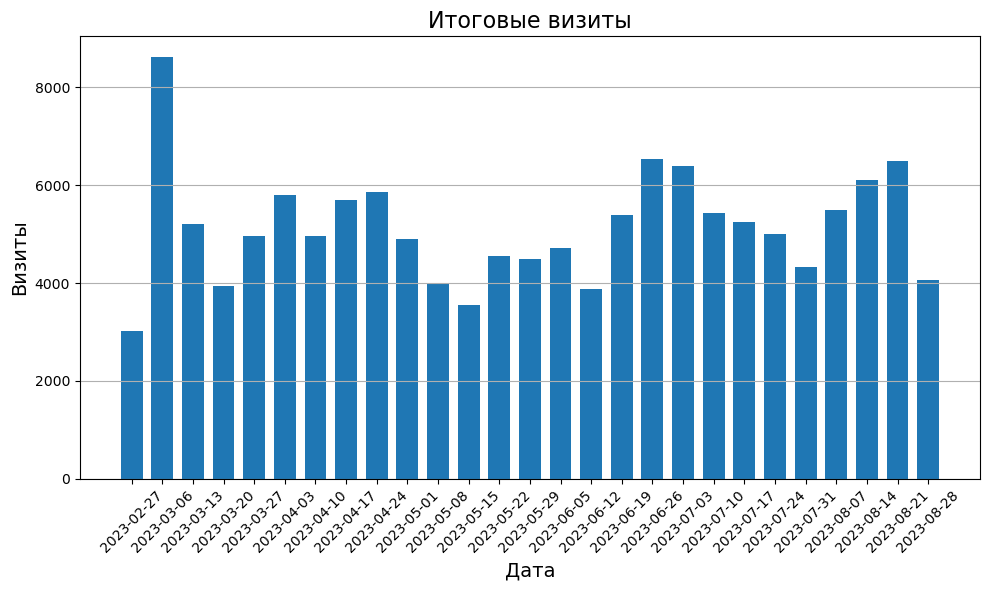

In [563]:
def total_visits(df):
    fig, ax = plt.subplots(figsize=(10,6))
    bars = plt.bar(x='date_week', height='visits', data=df, width=5)
    #ax.bar_label(bars)
    plt.title('Итоговые визиты', fontsize=16)
    plt.xlabel('Дата', fontsize=14)
    plt.ylabel('Визиты', fontsize=14)
    plt.xticks(df['date_week'], rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('./charts/total_visits.png')

In [593]:
print(conversion_week)

     date_week  visits  registrations  conversion    cost
0   2023-02-27    3026            574   18.968936  3462.0
1   2023-03-06    8615           1184   13.743471  3516.0
2   2023-03-13    5215            829   15.896453  1494.0
3   2023-03-20    3950            664   16.810127  1773.0
4   2023-03-27    4958            856   17.265026  3861.0
5   2023-04-03    5797           1058   18.250819  4761.0
6   2023-04-10    4967            978   19.689954  4647.0
7   2023-04-17    5700            973   17.070175  4050.0
8   2023-04-24    5861           1063   18.136837  3810.0
9   2023-05-01    4910            895   18.228106  4191.0
10  2023-05-08    3977            654   16.444556     0.0
11  2023-05-15    3559            648   18.207362  1725.0
12  2023-05-22    4558            800   17.551558  5178.0
13  2023-05-29    4499            701   15.581240  3585.0
14  2023-06-05    4720            729   15.444915  2139.0
15  2023-06-12    3871            688   17.773185     0.0
16  2023-06-19

# Итоговые визиты по платформам

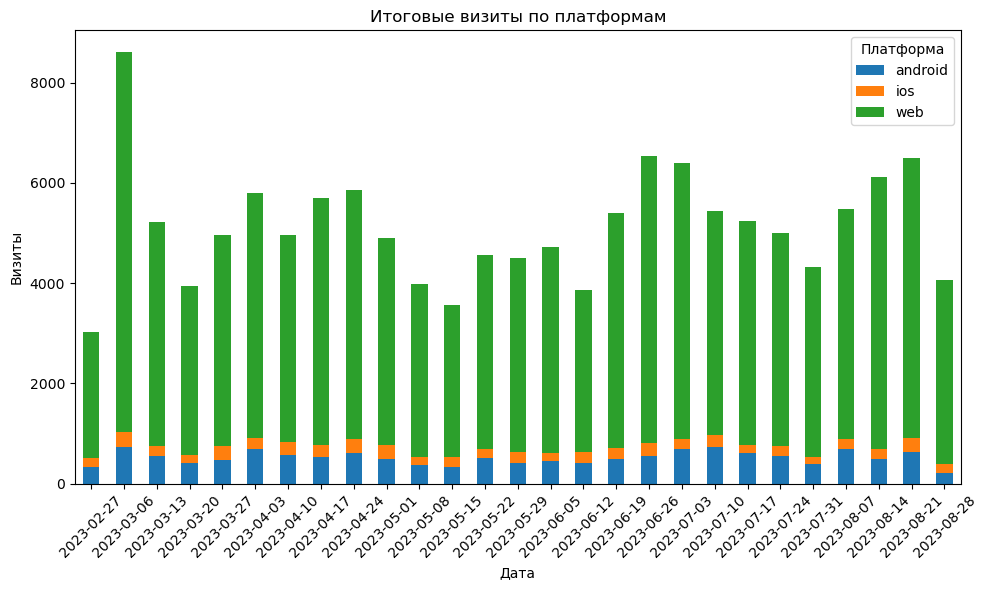

In [566]:
def total_registrations_platform(df):
    fig, ax = plt.subplots(figsize=(10,6))
    cnv_ads_pvt1 = df.pivot_table(index='date_week', columns='platform', values='visits')
    cnv_ads_pvt1.plot(kind='bar', stacked=True, ax=ax)
    plt.title('Итоговые визиты по платформам')
    ax.legend(title='Платформа')    
    plt.xticks(rotation=45)
    plt.xlabel('Дата')
    plt.ylabel('Визиты')
    plt.tight_layout()
    plt.savefig('./charts/total_visits_platform.png')
    plt.show()

total_registrations_platform(conversion_week_platform)

# Итоговые регистрации

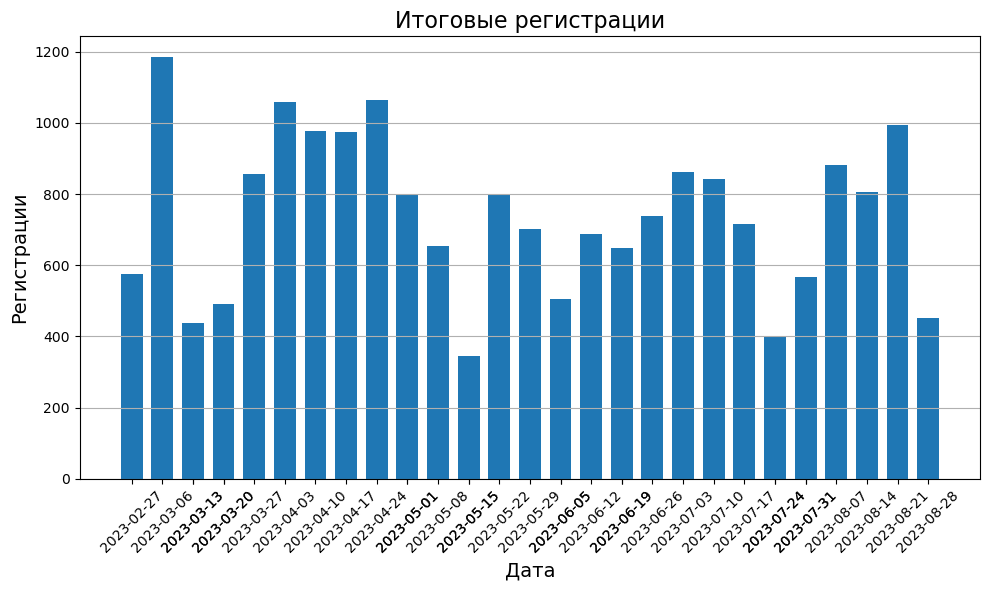

In [610]:
def total_registrations(df):
    fig, ax = plt.subplots(figsize=(10,6))
    bars = plt.bar(x='date_week', height='registrations', data=df, width=5)
    #ax.bar_label(bars)
    plt.title('Итоговые регистрации', fontsize=16)
    plt.xlabel('Дата', fontsize=14)
    plt.ylabel('Регистрации', fontsize=14)
    plt.xticks(df['date_week'], rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('./charts/total_registrations.png')

total_registrations(conversion_week)

# Итоговые визиты по платформам

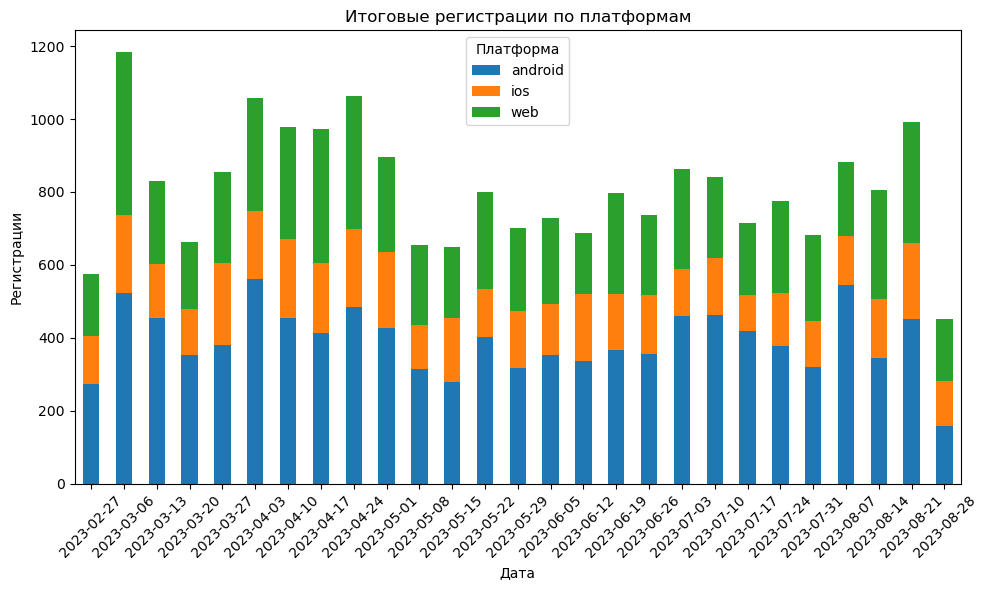

In [612]:
def total_registrations_platform(df):
    fig, ax = plt.subplots(figsize=(10,6))
    cnv_ads_pvt1 = df.pivot_table(index='date_week', columns='platform', values='registrations')
    cnv_ads_pvt1.plot(kind='bar', stacked=True, ax=ax)
    plt.title('Итоговые регистрации по платформам')
    ax.legend(title='Платформа')    
    plt.xticks(rotation=45)
    plt.xlabel('Дата')
    plt.ylabel('Регистрации')
    plt.tight_layout()
    plt.savefig('./charts/total_registrations_platform.png')
    plt.show()

total_registrations_platform(conversion_week_platform)

# Конверсия по каждой платформе

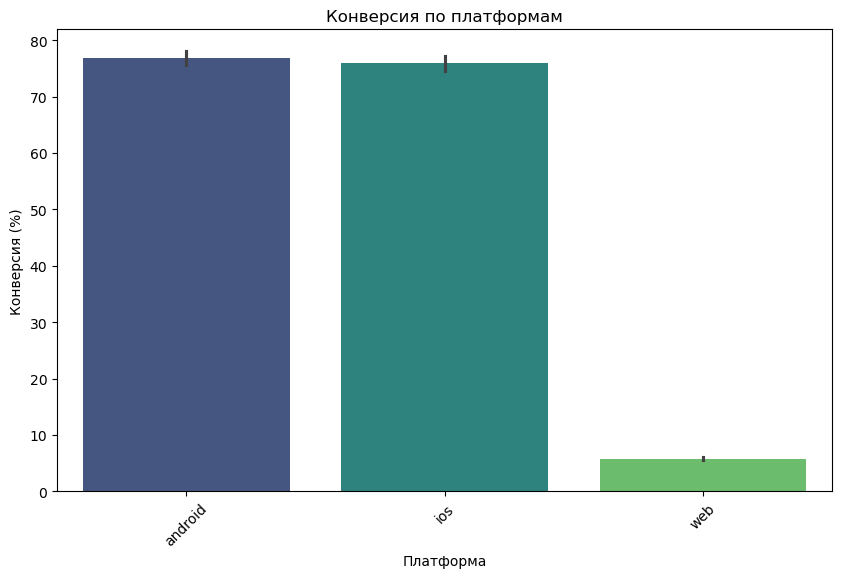

In [575]:
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='platform', y='conversion', estimator='mean', hue='platform', palette='viridis') 
plt.title('Конверсия по платформам')
plt.xlabel('Платформа')
plt.ylabel('Конверсия (%)')
plt.xticks(rotation=45)
plt.savefig('./charts/conversion_by_platform.png')
plt.show()

# Средняя конверсия

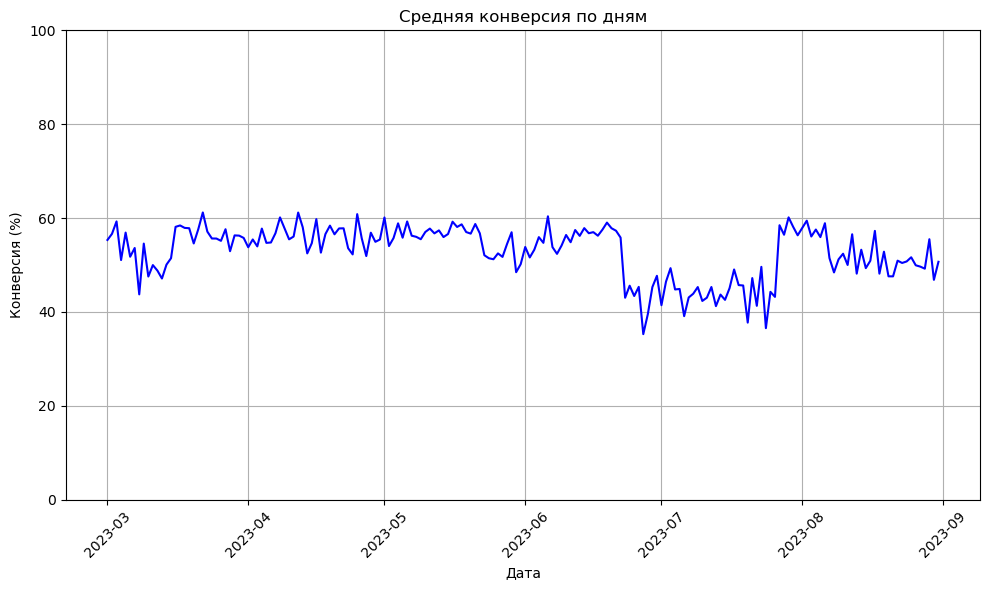

In [578]:
average_conversion_by_day = merged_df.groupby('date_group')['conversion'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_conversion_by_day.index, average_conversion_by_day.values, color='blue')
plt.title('Средняя конверсия по дням')
plt.xlabel('Дата')
plt.ylabel('Конверсия (%)')
plt.grid(axis='both')
plt.ylim(0, 100)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.savefig('./charts/average_conversion.png')
plt.show()

# Стоимость реклам

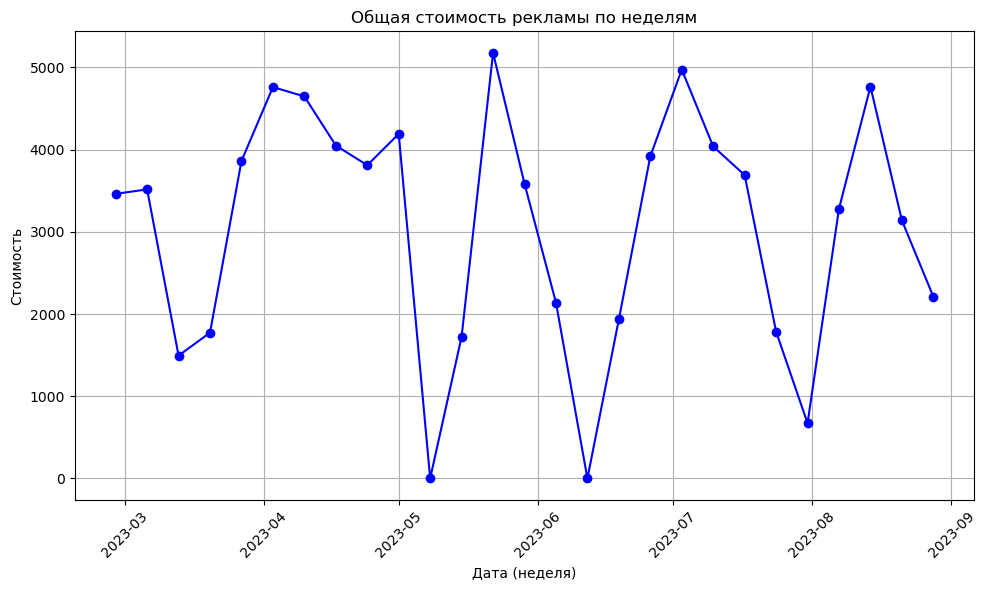

In [585]:
conversion_week, _ = weekly_data(chart_df)  
plt.figure(figsize=(10, 6))
plt.plot(conversion_week['date_week'], conversion_week['cost'], color='blue', marker='o', linestyle='-')
plt.title('Общая стоимость рекламы по неделям')
plt.xlabel('Дата (неделя)')
plt.ylabel('Стоимость')
plt.xticks(rotation=45)  
plt.grid(axis='both')    
plt.tight_layout()       
plt.savefig('./charts/ads_cost.png')
plt.show()

# Стоимость реклам по платформам

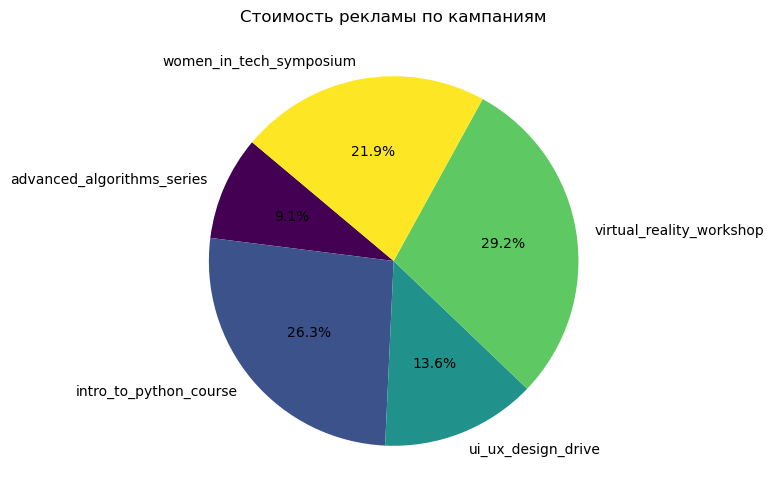

In [588]:
ads_cost = ads_df.groupby('utm_campaign')['cost'].sum().reset_index()

colors = cm.viridis(np.linspace(0, 1, len(ads_cost)))

plt.figure(figsize=(10, 6))
plt.pie(
    ads_cost['cost'],
    labels=ads_cost['utm_campaign'],
    autopct='%1.1f%%',   
    startangle=140,      
    colors=colors        
)
plt.title('Стоимость рекламы по кампаниям')
plt.savefig('./charts/ads_cost_by_platform.png')
plt.show()

# Визиты и регистрациии за весь период с цветовым выделением рекламной кампании

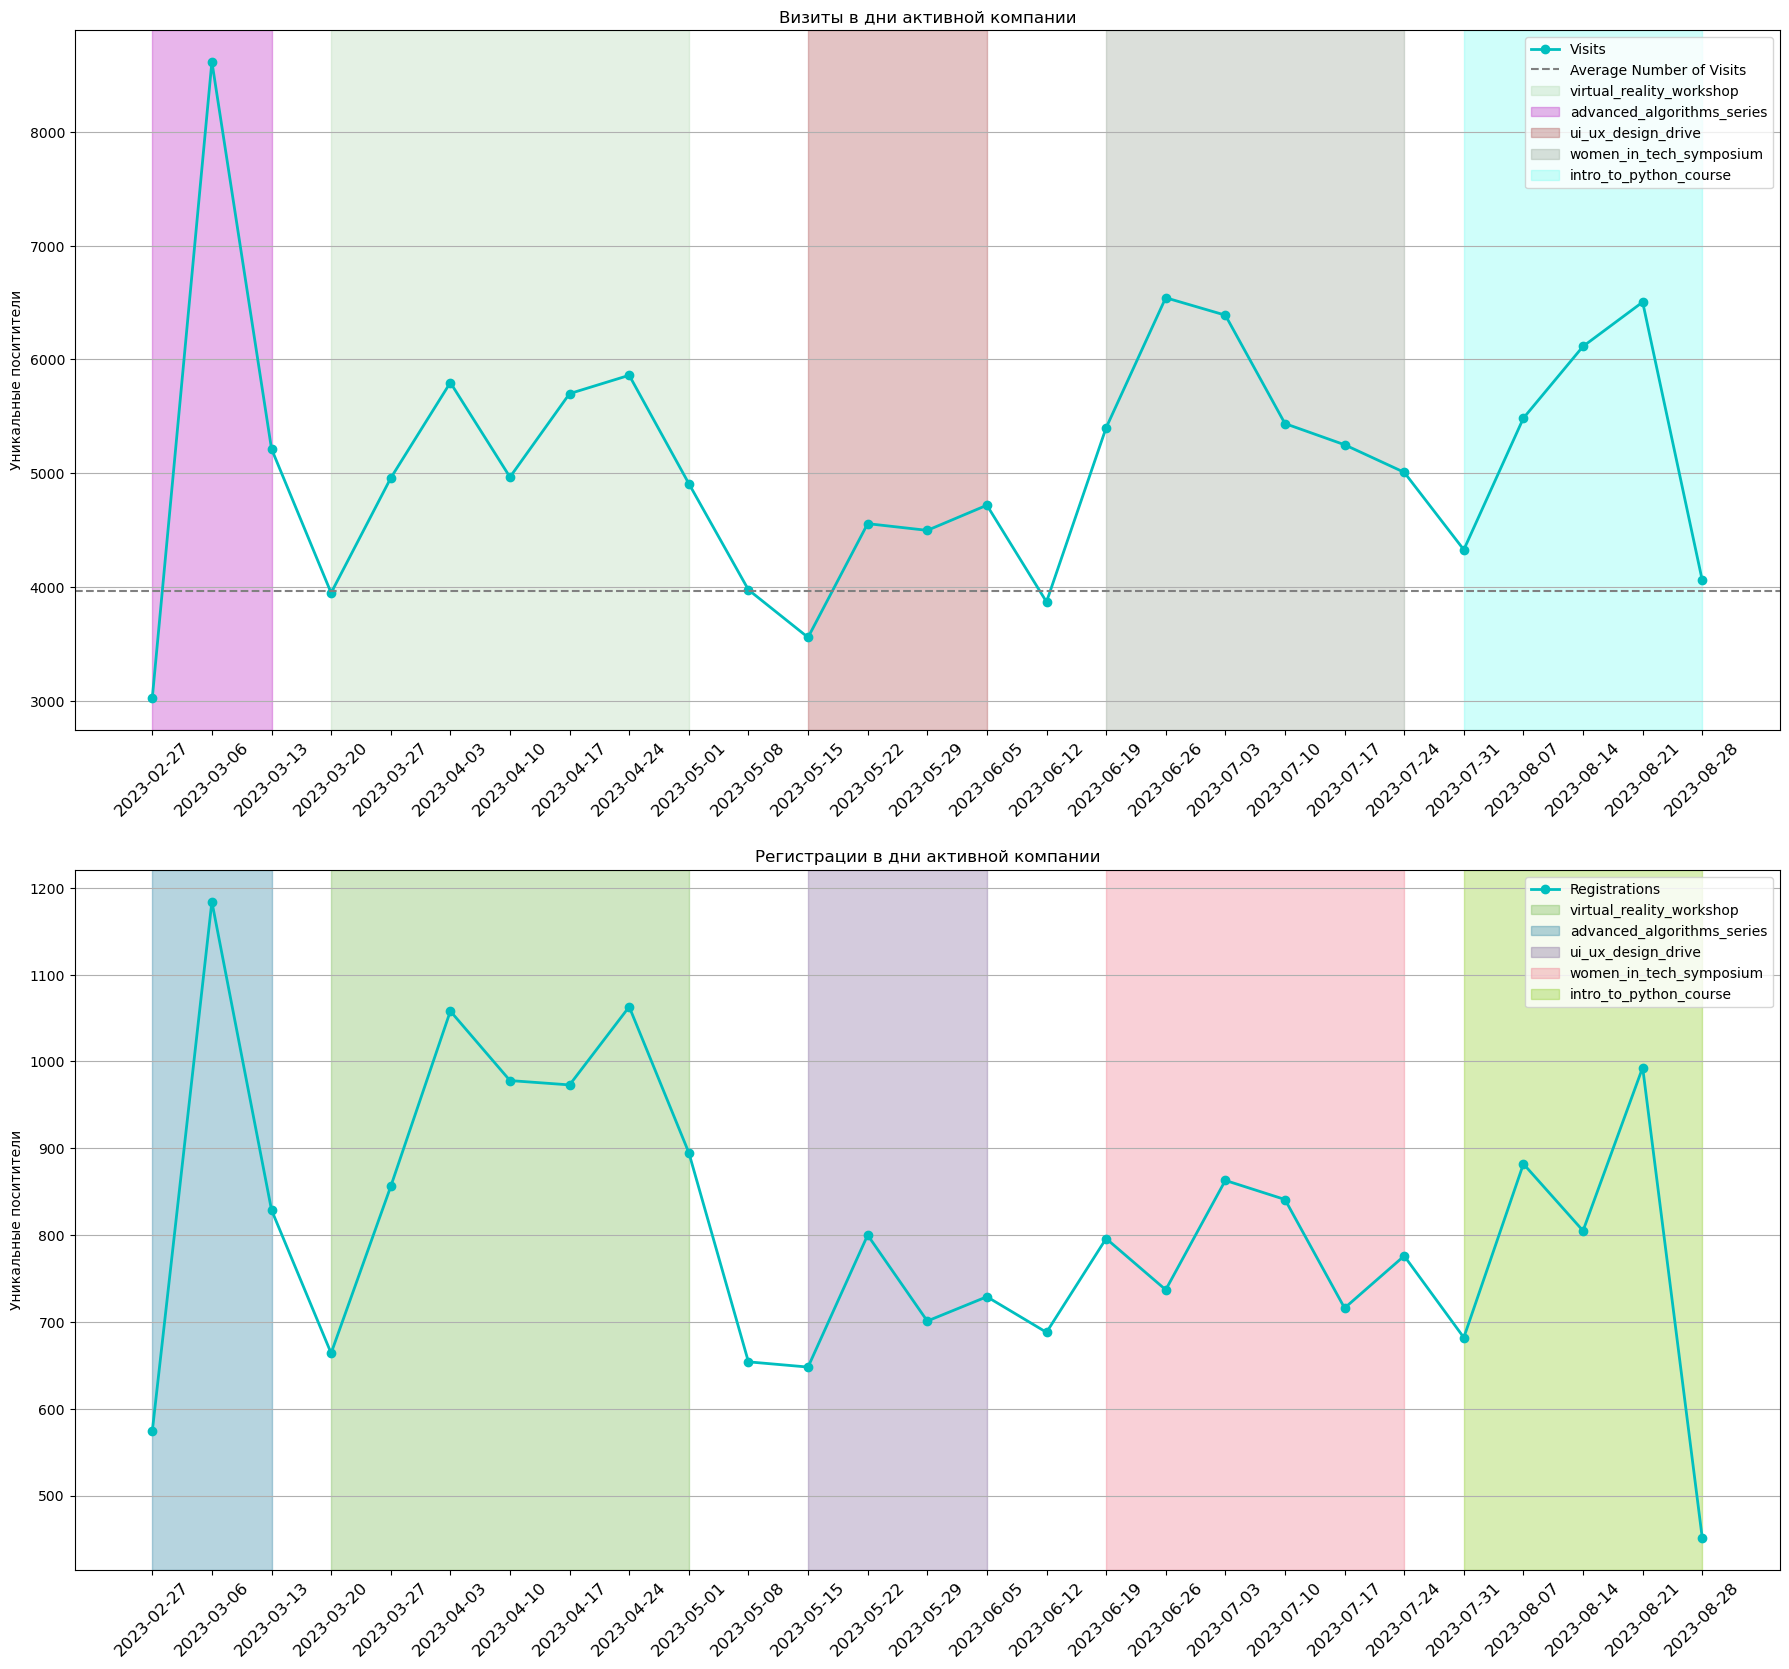

In [607]:
conversion_week = chart_df.copy()
conversion_week['date_week'] = pd.to_datetime(conversion_week['date_group'])
conversion_week['date_week'] = conversion_week['date_week'].dt.to_period('W').dt.start_time.dt.date
conversion_week = conversion_week.groupby(['date_week', 'utm_campaign']).sum(['visits', 'registrations', 'cost']).reset_index()
conversion_week['conversion'] = (conversion_week['registrations'] / conversion_week['visits']) * 100

campaign_days = conversion_week[['date_week', 'utm_campaign']]
virtual_reality_workshop = campaign_days.loc[campaign_days['utm_campaign'] == 'virtual_reality_workshop']
start_date = virtual_reality_workshop['date_week'].min()
end_date = virtual_reality_workshop['date_week'].max()

advanced_algorithms_series = campaign_days.loc[campaign_days['utm_campaign'] == 'advanced_algorithms_series']
start_date = advanced_algorithms_series['date_week'].min()
end_date = advanced_algorithms_series['date_week'].max()

ui_ux_design_drive = campaign_days.loc[campaign_days['utm_campaign'] == 'ui_ux_design_drive']
start_date = ui_ux_design_drive['date_week'].min()
end_date = ui_ux_design_drive['date_week'].max()

women_in_tech_symposium= campaign_days.loc[campaign_days['utm_campaign'] == 'women_in_tech_symposium']
start_date = women_in_tech_symposium['date_week'].min()
end_date = women_in_tech_symposium['date_week'].max()

intro_to_python_course = campaign_days.loc[campaign_days['utm_campaign'] == 'intro_to_python_course']
start_date = intro_to_python_course['date_week'].min()
end_date = intro_to_python_course['date_week'].max()    

periods_of_ads = pd.DataFrame(columns=['start_date', 'end_date', 'utm_campaign'])
periods_of_ads['start_date'] = [virtual_reality_workshop['date_week'].min(), advanced_algorithms_series['date_week'].min(), ui_ux_design_drive['date_week'].min(), women_in_tech_symposium['date_week'].min(), intro_to_python_course['date_week'].min()]
periods_of_ads['end_date'] = [virtual_reality_workshop['date_week'].max(), advanced_algorithms_series['date_week'].max(), ui_ux_design_drive['date_week'].max(), women_in_tech_symposium['date_week'].max(), intro_to_python_course['date_week'].max()]
periods_of_ads['utm_campaign'] = ['virtual_reality_workshop', 'advanced_algorithms_series', 'ui_ux_design_drive', 'women_in_tech_symposium', 'intro_to_python_course']


def vis_regist_campaign_chart(df):
    fig, axes = plt.subplots(2, 1, figsize=(22,20))
    visits_campaign = df.groupby(['date_week'])['visits'].sum().reset_index()
    x = visits_campaign['date_week']
    y = visits_campaign['visits']
    axes[0].plot(x, y,
            marker="o",
            c="c",
            label='Visits',
            linewidth=2,
            markersize=6)
    avg_visits = df['visits'].mean()
    axes[0].axhline(y=avg_visits, color='gray', linestyle='dashed', label='Average Number of Visits')
    ads_started = periods_of_ads['start_date'].to_list()
    ads_ended = periods_of_ads['end_date'].to_list()
    for i in range(len(ads_started)):
        axes[0].axvspan(ads_started[i], ads_ended[i], alpha=0.3, color=np.random.rand(3,), label=periods_of_ads['utm_campaign'].to_list()[i])
    axes[0].set_title('Визиты в дни активной компании')
    axes[0].set_ylabel('Уникальные поситители')
    axes[0].set_xticks(visits_campaign['date_week'])
    axes[0].set_xticklabels(visits_campaign['date_week'], fontsize=12, rotation=45)
    axes[0].legend()
    axes[0].grid(axis='y')
    registr_campaign = conversion_week.groupby(['date_week'])['registrations'].sum().reset_index()
    x3 = registr_campaign['date_week']
    y3 = registr_campaign['registrations']
    axes[1].plot(x3, y3,
            marker="o",
            c="c",
            label='Registrations',
            linewidth=2,
            markersize=6)
    avg_registrations = conv_ads['registrations'].mean()
    for i in range(len(ads_started)):
        axes[1].axvspan(ads_started[i], ads_ended[i], alpha=0.3, color=np.random.rand(3,), label=periods_of_ads['utm_campaign'].to_list()[i])
    axes[1].set_title('Регистрации в дни активной компании')
    axes[1].set_ylabel('Уникальные поситители')
    axes[1].set_xticks(registr_campaign['date_week'])
    axes[1].set_xticklabels(registr_campaign['date_week'], fontsize=12, rotation=45)
    axes[1].legend()
    axes[1].grid(axis='y')
    plt.savefig('./charts/visits_and_registration_by_platform.png')

vis_regist_campaign_chart(conversion_week)